## Methodology: Identifying the Most Optimal Skill for Data Analysts

    -Continue from the previous notebook to calculate the percentage of job postings that mention each skill.
    -Visualize the relationship between median salary and the percentage of job postings requiring each skill.
    -(Optional) Analyze whether certain technologies are more prevalent in job postings.


## Import Libraries and Data

Import the libraries, data and change the job_posted_date to a datetime type.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from datasets import load_dataset
import seaborn as sns
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

import ast
def string(list_word):
  if pd.notna(list_word):
    return ast.literal_eval(list_word)
df['job_skills'] = df['job_skills'].apply(string)

## Clean Data

Filter the original dataset to retain only rows where the job title is 'Data Analyst' and the country is 'United States,' creating a new DataFrame, df_DA_US. Remove NaN values from the salary_year_avg column. Use the explode method on the job_skills column to create a new DataFrame, df_DA_US_exploded, where each skill associated with a job has its own row. Finally, display the first five entries of the salary_year_avg and job_skills columns.

In [ ]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [ ]:

df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)



,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


## Calculate Percentage of Job Postings with Skills

Group the data by job skills and compute the count and median salary for each skill, sorting the results in descending order by count. Rename the columns for clarity. Calculate the percentage that each skill's count represents out of the total number of Data Analyst jobs. Finally, filter out any skills with no associated job postings.

In [ ]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

In [ ]:
df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_US)  # Find count of Data Analyst jobs in US with salary info
df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100
df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
theano,1,100000.0,0.022989
typescript,1,65000.0,0.022989
vmware,1,147500.0,0.022989



## Median Salary vs Percent Skill Demand

Filters for Data Analyst skills that exceed a certain percentage (skill_limit).


In [ ]:
df_DA_skills_high_demand  = df_DA_skills[df_DA_skills["skill_percent"] > 5]

In [ ]:
df_DA_skills_high_demand 

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701




Create a scatter plot to visualize the relationship between the percentage of Data Analyst jobs that require specific skills and the median salary for those skills.


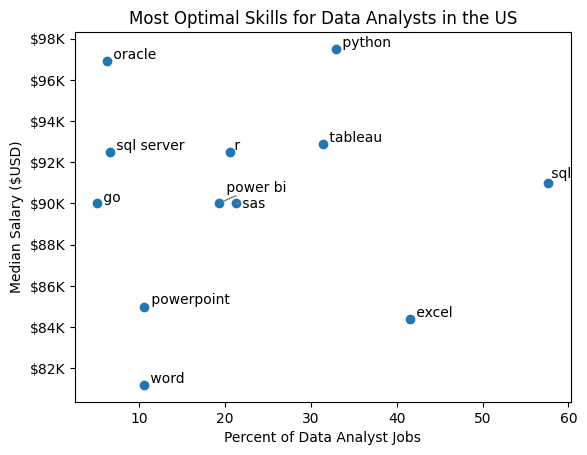

In [ ]:


from adjustText import adjust_text

plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the US')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()



## Coloring by Technology

Add color labels based on technology by following these steps:

    Remove duplicate entries and any rows with missing values.
    Combine all dictionary entries into a single dictionary, summing values for keys that appear across multiple entries.
    Ensure each key’s values are unique by converting the values to a set and then back to a list.

The final result is a dictionary where each key represents a skill, and each value is a list of unique attributes associated with that skill.

In [ ]:


df_technology = df['job_type_skills'].copy()

# remove duplicates

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))
technology_dict



{'analyst_tools': ['powerpoint',
  'powerbi',
  'sheets',
  'nuix',
  'esquisse',
  'power bi',
  'ms access',
  'ssrs',
  'spss',
  'alteryx',
  'datarobot',
  'word',
  'msaccess',
  'sas',
  'looker',
  'spreadsheet',
  'sap',
  'outlook',
  'tableau',
  'splunk',
  'excel',
  'qlik',
  'cognos',
  'dax',
  'visio',
  'sharepoint',
  'ssis',
  'microstrategy'],
 'programming': ['scala',
  'visual basic',
  'lua',
  'kotlin',
  'no-sql',
  'vba',
  'c#',
  'lisp',
  'vb.net',
  'mongodb',
  'visualbasic',
  'mongo',
  'cobol',
  'sass',
  'php',
  'pascal',
  'ocaml',
  'c++',
  'groovy',
  't-sql',
  'python',
  'css',
  'bash',
  'solidity',
  'javascript',
  'c',
  'nosql',
  'dart',
  'sas',
  'clojure',
  'haskell',
  'erlang',
  'golang',
  'f#',
  'sql',
  'objective-c',
  'powershell',
  'rust',
  'swift',
  'assembly',
  'elixir',
  'shell',
  'fortran',
  'perl',
  'apl',
  'delphi',
  'julia',
  'go',
  'matlab',
  'ruby',
  'java',
  'r',
  'html',
  'typescript',
  'crys



This code converts a dictionary into a pandas DataFrame, then explodes the 'skills' column, creating multiple rows for each 'technology' entry if it contains multiple skills.


In [ ]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

In [ ]:

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,powerpoint
0,analyst_tools,powerbi
0,analyst_tools,sheets
0,analyst_tools,nuix
0,analyst_tools,esquisse
...,...,...
9,sync,ringcentral
9,sync,mattermost
9,sync,twilio
9,sync,symphony




Merges two DataFrames, df_DA_skills and df_technology, based on the columns 'job_skills' and 'skills' respectively, creating a new DataFrame df_DA_skills_tech.


In [ ]:


# merge df_DA_skills and df_technology
df_DA_skills_tech = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')
# Filters df_DA_skills_tech to select rows where the 'percent' column exceeds a specified threshold

df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] > 5]




In [ ]:
df_DA_skills_tech_high_demand

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word




Plot the results in a scatter plot, coloring the points based on the 'technology' column.


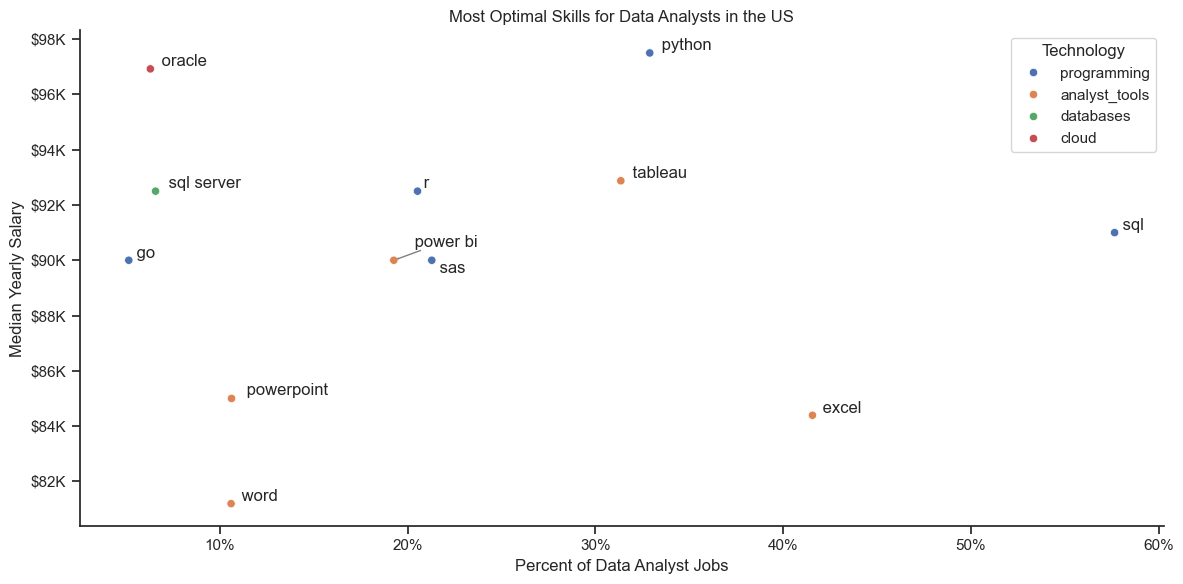

In [ ]:
from adjustText import adjust_text
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_DA_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i]," "+ txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))
plt.tight_layout()


# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.legend(title='Technology')

    
 
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))


plt.tight_layout()

